In [1]:
import os
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [2]:
import pandas as pd
import numpy as np
from multi_funcs import *

In [58]:
results = s_simulate((1000, 3))

In [59]:
preferences = results[0]
gs = results[1][1]
eadam_results = results[1][4]

In [60]:
get_max_weight_matching(preferences, eadam_results, 1000, 3, True)

(2,
 832,
 {('0S', 149),
  ('100S', 357),
  ('102S', 130),
  ('103S', 280),
  ('104S', 364),
  ('109S', 82),
  ('10S', 176),
  ('110S', 120),
  ('112S', 154),
  ('117S', 7),
  ('118S', 84),
  ('11S', 32),
  ('121S', 21),
  ('124S', 9),
  ('128S', 81),
  ('129S', 196),
  ('130S', 369),
  ('131S', 334),
  ('136S', 245),
  ('137S', 308),
  ('13S', 45),
  ('140S', 218),
  ('141S', 282),
  ('142S', 276),
  ('144S', 262),
  ('146S', 41),
  ('147S', 106),
  ('14S', 349),
  ('151S', 193),
  ('156S', 3),
  ('157S', 255),
  ('164S', 101),
  ('166S', 24),
  ('167S', 254),
  ('169S', 226),
  ('172S', 303),
  ('175S', 28),
  ('177S', 157),
  ('17S', 324),
  ('184S', 168),
  ('188S', 370),
  ('193S', 318),
  ('194S', 381),
  ('199S', 331),
  ('200S', 43),
  ('201S', 10),
  ('203S', 86),
  ('206S', 136),
  ('208S', 292),
  ('213S', 268),
  ('214S', 190),
  ('215S', 338),
  ('216S', 98),
  ('219S', 58),
  ('220S', 321),
  ('222S', 377),
  ('224S', 319),
  ('226S', 314),
  ('230S', 146),
  ('232S', 161

In [5]:
k=3
n=1000

In [6]:
schools_to_remove = eadam_results[eadam_results['applications'] == 0][0]

In [7]:
eadam_results = eadam_results[eadam_results['applications'] != 0] ## Here I dropped the rows where only a single application was made. 

In [8]:
preferences = preferences[preferences['student_id'].isin(eadam_results['student_id'])]
preferences.reset_index(inplace = True, drop = True) 

In [9]:
preferences.sort_values(by = 'student_id', inplace = True)
eadam_results.sort_values(by = 'student_id', inplace = True)

In [10]:
eadam_results.reset_index(inplace = True, drop = True)

In [11]:
has_checked = np.zeros(len(preferences))

In [12]:
for i in range(0,k):
    preferences.iloc[:,i] = np.where(has_checked == False, preferences.iloc[:, i], -100)
    has_checked = np.where(preferences.iloc[:, i] == eadam_results.iloc[:, 0], True, has_checked)
    

In [13]:
relevant = pd.DataFrame(preferences.iloc[:, :k].stack(level = 0)).reset_index()

In [14]:
pointing = relevant[relevant[0] != -100]
pointing = pointing.reset_index(drop=True)
# Set Appropriate Weigths for the edgelist (3n on match, 3n+1 on all preferred)
sizes = pointing.groupby('level_0').count()[0].to_list()
l1 = [([k*n+1]*(l-1) + [k*n]) for l in sizes]
l2 = [item for sublist in l1 for item in sublist]
pointing['weight'] = l2

In [15]:
pointing = pointing[~pointing[0].isin(schools_to_remove)]

In [16]:
pointing[0] = pointing[0].astype(str)+'S' 
pointing.drop('level_1', axis = 1, inplace = True)
pointing.columns = ['source', 'target', 'weight']

In [17]:
pointing

,source,target,weight
2,0,220S,3000
4,1,563S,3000
7,2,773S,3000
8,3,410S,3001
9,3,707S,3001
...,...,...,...
883,372,784S,3001
884,372,678S,3000
885,373,569S,3001
886,373,744S,3000


In [18]:
original = pointing[pointing.weight == 3000]

In [19]:
original = original[['source', 'target']]

In [20]:
G= nx.from_pandas_edgelist(pointing, edge_attr = True)
# Solve for Max Weight Matching
max_weight_matching = nx.max_weight_matching(G)
max_matches = pd.DataFrame(max_weight_matching)

In [21]:
max_matches['school_id'] = np.where(max_matches[0].isin(original['target']), max_matches[0], max_matches[1])
max_matches['student_id'] = np.where(max_matches[0].isin(original['target']), max_matches[1], max_matches[0])
x2 = set(zip(max_matches['school_id'], max_matches['student_id']))
x1 = set(zip(original['target'], original['source']))
n_diff = len(x1.difference(x2))

In [22]:
n_diff

2

In [3]:
ns = [1000]
ks = [5]

for k in ks:
    for n in ns:
        results = f_simulate_MM_EA_GS(1000, n, k)
        df = make_df_max_match_length(n,k, results, save = True)

: 

In [20]:
df_eadam = pd.read_csv('data/simulations/max_length_matches_w_eadam/n_2000_k_4_max_length_diff_eadam.csv')
df = pd.read_csv('data/simulations/max_length_matches_w_eadam/n_2000_k_4_max_length_diff.csv')

In [21]:
df_eadam['type'] = 'eadam'
df['type'] = 'gs'

In [23]:
df_eadam.columns = df.columns

In [24]:
df = pd.concat([df, df_eadam])

In [25]:
df = df.groupby(['cycle_lengths', 'type'], as_index=False).count()

In [26]:
df['n_agents_in_cycle_of_size_x'] = df['cycle_lengths'] * df['n']

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='cycle_lengths', ylabel='Count'>

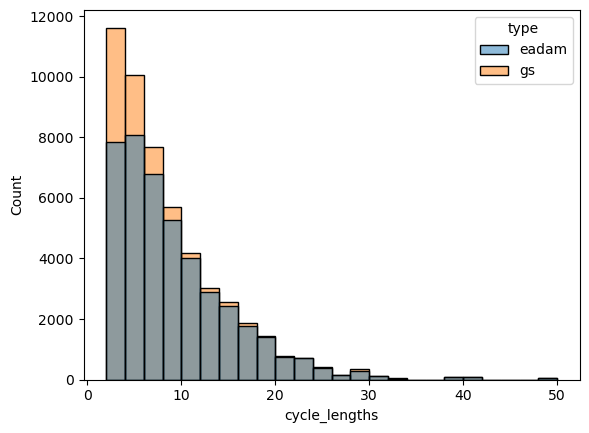

In [28]:
sns.histplot(df, x="cycle_lengths", weights='n_agents_in_cycle_of_size_x', hue = 'type', binwidth=2, kde=False)

In [ ]:
def make_plot(n, k, axis):    
    df_eadam = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_{k}_4_max_length_diff_eadam.csv')
    df = pd.read_csv('data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_length_diff.csv')
    df_eadam['type'] = 'eadam'
    df['type'] = 'gs'
    df_eadam.columns = df.columns
    df = pd.concat([df, df_eadam])
    df = df.groupby(['cycle_lengths', 'type'], as_index=False).count()
    df['n_agents_in_cycle_of_size_x'] = df['cycle_lengths'] * df['n']
    sns.histplot(df, x="cycle_lengths", weights='n_agents_in_cycle_of_size_x', hue = 'type', binwidth=2, kde=False, ax=axis)
    axis.set_title(f'Distribution of Cycle Membership: n = {n}, k = {k}')
    axis.set_ylabel('Number of Agents in Cycle of Size X')